In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_ATS_v2.csv to Dataset_ATS_v2.csv


# Data Exploration

- Check for missing data
- Create graph that shows the data proportion to see if it is skewed or not
- Handle missing data and load categorical variable
- Feature scaling and normalisation
- ensure data integrity and consistency

In [ ]:
# Import Data
import pandas as pd
import numpy as np
import matplotlib as plt
import io
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


#df= pd.read_csv("Dataset_ATS_v2.csv")
df = pd.read_csv(io.StringIO(uploaded['Dataset_ATS_v2.csv'].decode('utf-8')))
df.head()

df.head()
#df.info()
#df.isnull().sum()
#df.shape

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


### Comments

From the data we can see that there is no null value
- the table has 7043 rows and 10 columns
there are 2 types of variable:
- Categorical variables: Gender, SeniorCitizen, Dependents, Phone Service, MultipleLines, InternetService, Contract, Churns
- Numerical variables: tenure, MonthlyCharges

## Catergorical Variable

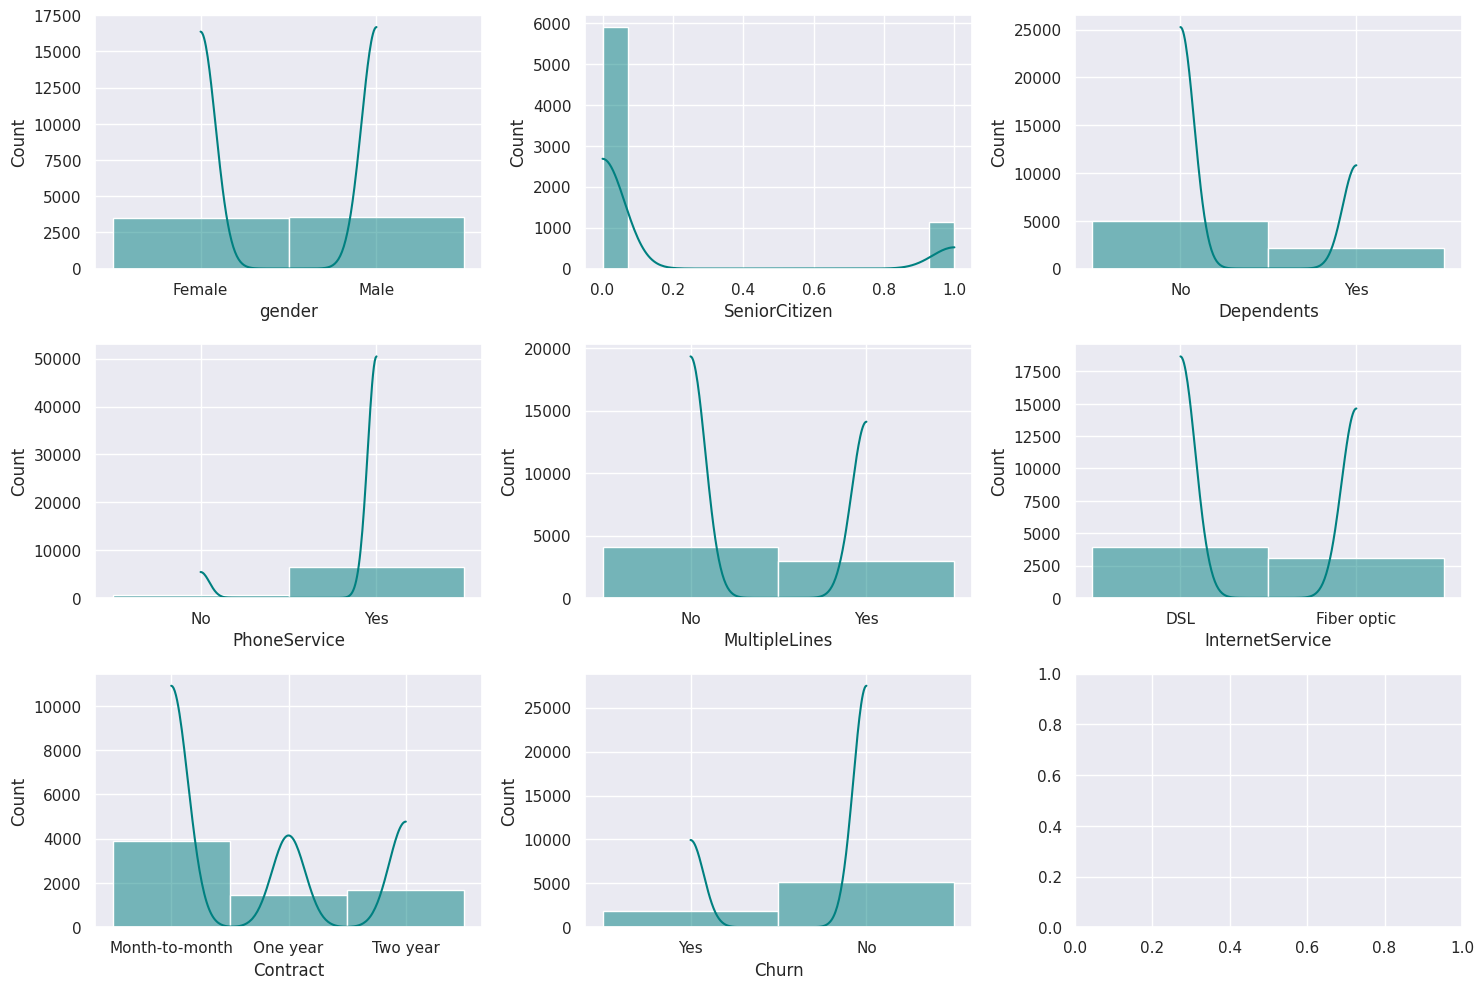

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style= "darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # 2 rows, 3 columns

sns.histplot(data=df, x="gender", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="SeniorCitizen", kde=True, color="teal", ax=axs[0, 1])
sns.histplot(data=df, x="Dependents", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=df, x="PhoneService", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="MultipleLines", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="InternetService", kde=True, color="teal", ax=axs[1, 2])
sns.histplot(data=df, x="Contract", kde=True, color="teal", ax=axs[2, 0])
sns.histplot(data=df, x="Churn", kde=True, color="teal", ax=axs[2, 1])



# If you want to add another histogram to the last subplot, use axs[1, 2]
# sns.histplot(data=df_new, x="Another Feature", kde=True, color="teal", ax=axs[1, 2])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

- Majority of customer using the service are non senior citizens (6000 Customers)
- The churn figures is one third of no churn

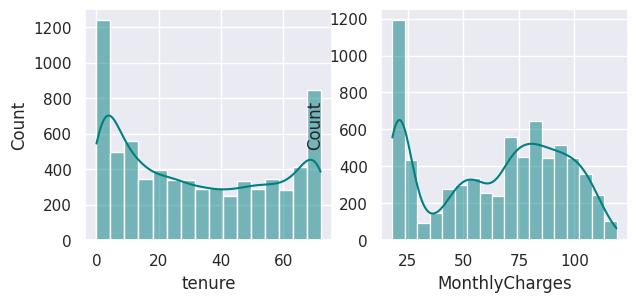

In [ ]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(7, 3))

sns.histplot(data=df, x="tenure", kde=True, color="teal", ax=axs[0])
sns.histplot(data=df, x="MonthlyCharges", kde=True, color="teal", ax=axs[1])

plt.show()

<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

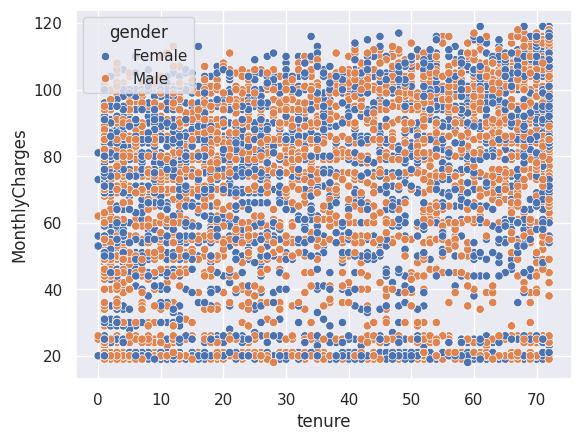

In [ ]:
sns.scatterplot(x="tenure", y="MonthlyCharges", data=df, hue="gender")

## KMeans Clustering

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Create a copy of the original DataFrame to preserve it
df_model = df.copy()

# Encode 'Churn': Yes → 1, No → 0
df_model['Churn'] = df_model['Churn'].map({'Yes': 1, 'No': 0})

# Define nominal and ordinal categorical columns
nominal_cols = ['gender', 'SeniorCitizen', 'Dependents', 'PhoneService',
                'MultipleLines', 'InternetService']
ordinal_col = 'Contract'

# Dictionary to store label encoders for nominal features
label_encoders = {}

# Apply Label Encoding to nominal features
for col in nominal_cols:
    if df_model[col].dtype == 'object' or col == 'SeniorCitizen':
        le = LabelEncoder()
        df_model[col] = le.fit_transform(df_model[col])
        label_encoders[col] = le  # Store encoder for potential inverse_transform later

# Apply Ordinal Encoding to 'Contract'
contract_order = [['Month-to-month', 'One year', 'Two year']]
ordinal_encoder = OrdinalEncoder(categories=contract_order)
df_model[ordinal_col] = ordinal_encoder.fit_transform(df_model[[ordinal_col]])

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,0,0,0,1,0,0,0,0.0,25,1
1,1,0,0,41,1,0,0,1.0,25,0
2,0,0,1,52,1,0,0,0.0,19,0
3,0,0,0,1,1,0,0,1.0,76,1
4,1,0,0,67,1,0,1,0.0,51,0


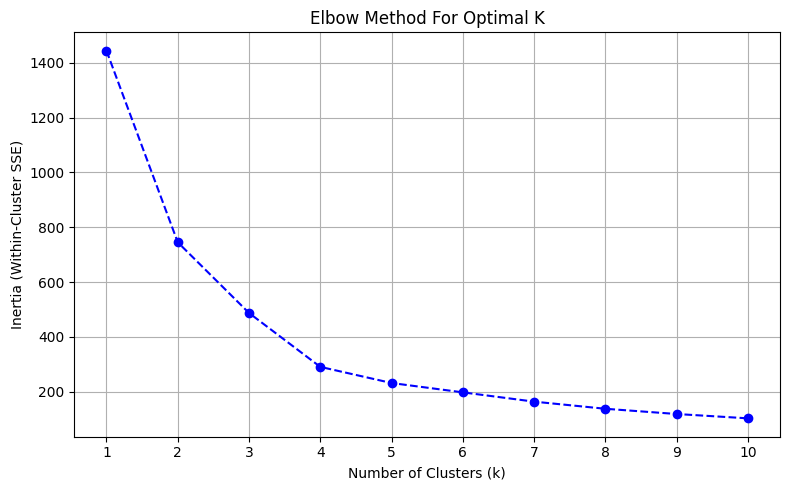

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

# Normalize only selected numeric features for clustering
scaler = MinMaxScaler()
features_to_scale = ['tenure', 'MonthlyCharges']
df_scaled = df_model.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df_model[features_to_scale])

# Convert to NumPy array
X = df_scaled[features_to_scale].to_numpy()  # Clustering only on selected features

# Calculate inertia for different values of k
inertias = []

for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10,
        max_iter=300,
        random_state=0
    )
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.tight_layout()
plt.show()

## KMeans model

In [ ]:
X = df_model.drop(columns=['Churn']).values

# Step 2: Train the KMeans model with 4 clusters
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Predict the cluster for each observation
y_km = kmeans.predict(X)

# Add cluster labels to the original dataframe
df_kmeans = df.copy()
df_kmeans['KMeans_segment'] = y_km

In [ ]:
# Make a copy before transformation
df_kmeans_cleaned = df_kmeans.copy()

# Binary conversion: Yes → 1, No → 0
binary_columns = ['Dependents', 'PhoneService', 'MultipleLines', 'Churn']
for col in binary_columns:
    if col in df_kmeans_cleaned.columns:
        df_kmeans_cleaned[col] = df_kmeans_cleaned[col].map({'Yes': 1, 'No': 0})

# Ordinal conversion for 'Contract'
contract_map = {'Month-to-month': 1, 'One year': 2, 'Two year': 3}
if 'Contract' in df_kmeans_cleaned.columns:
    df_kmeans_cleaned['Contract'] = df_kmeans_cleaned['Contract'].map(contract_map)

# View updated DataFrame
display(df_kmeans_cleaned.head())

# Cluster-wise mean of numerical features
cluster_means = df_kmeans_cleaned.groupby('KMeans_segment').mean(numeric_only=True)

# Show churn rate per cluster (if Churn is included)
if 'Churn' in df_kmeans_cleaned.columns:
    print("\n📊 Average Churn Rate per Cluster:")
    display(df_kmeans_cleaned.groupby('KMeans_segment')['Churn'].mean())

# Show feature averages per cluster
print("\n📌 Cluster Feature Averages:")
display(cluster_means)


,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn,KMeans_segment
0,Female,0,0,1,0,0,DSL,1,25,1,3
1,Male,0,0,41,1,0,DSL,2,25,0,1
2,Female,0,1,52,1,0,DSL,1,19,0,1
3,Female,0,0,1,1,0,DSL,2,76,1,0
4,Male,0,0,67,1,0,Fiber optic,1,51,0,1



📊 Average Churn Rate per Cluster:


,Churn
KMeans_segment,
0,0.490876
1,0.047785
2,0.159184
3,0.244828



📌 Cluster Feature Averages:


,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,Contract,MonthlyCharges,Churn
KMeans_segment,,,,,,,,
0,0.228558,0.198449,14.785128,0.993613,0.424726,1.688869,81.019161,0.490876
1,0.078193,0.437011,54.164205,0.748045,0.407472,1.699392,33.908775,0.047785
2,0.217857,0.328571,58.590306,0.987755,0.431122,1.684184,93.262755,0.159184
3,0.071264,0.303448,10.575287,0.796552,0.417241,1.693678,32.573563,0.244828


### Comment
**Customer Group 1: Higher Monthly Charges with Medium Tenure and High Churn
Senior Citizen: ~23%**

- Dependents: ~20%

- Average Tenure: ~15 months (medium-low loyalty)

- Phone Service: Almost all customers have phone service (~99%)

- Multiple Lines: ~42% have multiple phone lines

- Contract Type: Average around 1.69, indicating mostly Month-to-month or One-year contracts

- Monthly Charges: Highest among clusters (~$81)

- Churn Rate: Very high at **~49%**

Customers in this cluster tend to pay higher monthly charges, have relatively short tenure, and a high likelihood to churn. These may be price-sensitive customers with month-to-month plans.

**Customer Group 2: Long-term Customers with Low Monthly Charges and Low Churn**
Senior Citizen: ~8% (lowest among clusters)

- Dependents: ~44% (highest)

- Average Tenure: ~54 months (long-term loyalty)

- Phone Service: ~75% have phone service

- Multiple Lines: ~41% have multiple lines

- Contract Type: Around 1.7 (mixed contract types, leaning towards longer terms)

- Monthly Charges: Low (~$34)

- Churn Rate: Very low at ~4.8%

These customers tend to have longer tenure, more dependents, pay lower monthly fees, and exhibit strong loyalty with minimal churn risk.

**Customer Group 3: High Monthly Charges with Long Tenure and Moderate Churn**
- Senior Citizen: ~22%

- Dependents: ~33%

- Average Tenure: ~59 months (long-term customers)

 -Phone Service: Almost all (~99%) have phone service

- Multiple Lines: ~43% have multiple lines

- Contract Type: Around 1.68 (mostly month-to-month or one-year contracts)

- Monthly Charges: Highest overall (~$93)

- Churn Rate: Moderate at ~16%

This cluster includes long-term customers with high monthly charges and moderate churn, possibly premium users who may be reconsidering their plans.

**Customer Group 4: Short Tenure, Low Monthly Charges, and Moderate Churn**
- Senior Citizen: ~7% (lowest)

- Dependents: ~30%

- Average Tenure: ~11 months (newer customers)

- Phone Service: ~80% have phone service

- Multiple Lines: ~42% have multiple lines

- Contract Type: Around 1.69 (month-to-month dominant)

- Monthly Charges: Low (~$33)

- Churn Rate: Moderate at ~24%

This group mainly consists of newer customers with low monthly charges and moderate churn risk. Likely they are still deciding on their long-term commitment.

**Overall:**
- Clusters 1 and 2 represent customers with longer tenure and lower churn rates but differ by monthly charges.

- Clusters 0 and 3 have higher churn risks with generally shorter tenure and lower contract commitment.

- Marketing strategies could focus on retaining high-risk groups (Clusters 0 and 3) through targeted offers or incentives.

- Cluster 1 shows a loyal customer base, possibly ideal for upselling premium services.

- Cluster 2 might benefit from engagement to reduce moderate churn despite their high spending.